<a href="https://colab.research.google.com/github/nurfadilahfirdaus5-cloud/Projek-Akhir_Data-Mining_Kelompok-D_DS/blob/main/Projek_Akhir_Data_Mining_Kelompok_D_DS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS AKHIR PENGANTAR PENAMBANGAN DATA**
-----------------------------------------------
##**Kelompok D :**
| No | Nama | NIM |
|-------- |-------- | -------- |
| 1 |Ammar Hawari | 11230940000003   |
| 2 |Siti Nuryani | 11230940000010   |
| 3 |Nafla Putri Kinanti   | 11230940000018   |
| 4 |Nur Fadilah Firdaus   | 11230940000023   |
| 5 |Muhamad Raffy Izzudin | 11230940000064   |

# **INSTALL DAN IMPORT LIBRARY**

In [53]:
!pip install PySastrawi
!pip install google-play-scraper
#!pip install gensim
!pip install transformers datasets --quiet
!pip install evaluate
!pip install --upgrade transformers

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from datasets import Dataset
import evaluate

import numpy as np
import matplotlib.pyplot as plt
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all
import evaluate
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf
from datasets import Dataset
#from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import random
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from transformers import AutoModelForSequenceClassification
# Corrected: Use TFAutoModelForSequenceClassification with the actual model identifier
model = TFAutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p1")

SEED = 4
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# Removed: set_seed is not defined and redundant with the above calls
# set_seed(SEED)

import nltk
import re
from PIL import Image
import pandas as pd
import string
nltk.download('punkt_tab')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory_stem = StemmerFactory()
stemmer = factory_stem.create_stemmer()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory_sw = StopWordRemoverFactory()
stopwords_indo = factory_sw.get_stop_words()

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **SCRAPING 3 APLIKASI**

In [55]:
def scrape_review(lang='id', id_link=id):
  reviews = reviews_all(id_link,sleep_milliseconds=0, # defaults to 0
                      #lang=lang, country='id', # bisa dihilangkan atau dipake
                      sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
                      )

  df = pd.DataFrame(np.array(reviews),columns=['review'])
  df = df.join(pd.DataFrame(df.pop('review').tolist()))
  return df

### **1. SCRAPING TRAVELOKA**

In [56]:
from google_play_scraper import Sort, reviews_all

# Redefine the scrape_review function so that reviews_all and Sort are in scope
def scrape_review(lang='id', id_link=id):
  reviews = reviews_all(id_link,sleep_milliseconds=0, # defaults to 0
                      #lang=lang, country='id', # bisa dihilangkan atau dipake
                      sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
                      )

  df = pd.DataFrame(np.array(reviews),columns=['review'])
  df = df.join(pd.DataFrame(df.pop('review').tolist()))
  return df

id ='com.traveloka.android' #isi id disini
data_traveloka = scrape_review(lang='id', id_link=id)
data_traveloka.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f159495a-7b11-4b04-9db1-f7bc5aed507f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,5.35.0,2025-12-29 12:26:10,Hey there! We are so grateful for your support...,2025-12-29 12:35:10,5.35.0
1,f8f8c632-5673-4839-bdfe-b0458fad0e93,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,5,0,5.35.0,2025-12-29 07:02:26,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-12-29 07:05:12,5.35.0
2,f9699f5f-a446-487e-b1fe-00f929004712,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"cool, best ever. thx",5,0,5.35.0,2025-12-29 04:57:29,Hello! Thank you very much for the positive re...,2025-12-29 05:05:04,5.35.0
3,0bed6585-455e-4014-b3fa-fcdfb67610a5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,kelas,5,0,5.35.0,2025-12-29 03:57:18,"Hai Kak, senang sekali dapat rating bagus dari...",2025-12-29 04:05:07,5.35.0
4,5da14773-2a3d-4c96-85f3-72d9a6187c8d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,easy & helpful,5,0,None,2025-12-29 00:03:04,Hello! Thank you very much for the positive re...,2025-12-29 00:05:07,None
5,83457916-cb3f-481e-830c-5cd3c89dc79f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,banyak pilihan dan terpercaya,5,0,5.35.0,2025-12-28 16:47:27,"Hai Kak, senang sekali dapat rating bagus dari...",2025-12-28 17:05:09,5.35.0
6,b24d9266-3ef2-4121-a62d-329d4abafe75,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"tombol booking kamar hotel menipu, jadinya mem...",1,0,5.35.0,2025-12-28 16:23:31,"Hai Kunto, kami mohon maaf terkait masalah den...",2025-12-28 16:45:10,5.35.0
7,bf375d0a-2b68-4252-8cec-a08851bc686c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"minim promotion, payable ticket for refund fle...",1,0,5.35.0,2025-12-28 16:00:33,"Hi Tennman, we apologize if our latest promoti...",2025-12-28 16:16:12,5.35.0
8,c781b9b2-3d73-4528-97f8-48734b16d417,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice app,5,0,5.35.0,2025-12-28 13:12:54,Hello! Thank you very much for the positive re...,2025-12-28 13:35:12,5.35.0
9,ab775f8a-7f52-4a63-9f54-34314803fc0f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah digunakan, bahkan utk pemesanan diluar n...",4,1,5.35.0,2025-12-28 11:28:08,"Hai, Kak Fachmi. Agar kami bisa bantu cek lebi...",2021-01-29 01:06:07,5.35.0


In [57]:
from google_play_scraper import Sort, reviews_all

# Redefine the scrape_review function so that reviews_all and Sort are in scope
def scrape_review(lang='id', id_link=id):
  reviews = reviews_all(id_link,sleep_milliseconds=0, # defaults to 0
                      #lang=lang, country='id', # bisa dihilangkan atau dipake
                      sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
                      )

  df = pd.DataFrame(np.array(reviews),columns=['review'])
  df = df.join(pd.DataFrame(df.pop('review').tolist()))
  return df

id ='com.traveloka.android' #isi id disini
data_traveloka = scrape_review(lang='id', id_link=id)
data_traveloka['aplikasi'] = 'Traveloka'
data_traveloka.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,aplikasi
0,f159495a-7b11-4b04-9db1-f7bc5aed507f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,5.35.0,2025-12-29 12:26:10,Hey there! We are so grateful for your support...,2025-12-29 12:35:10,5.35.0,Traveloka
1,f8f8c632-5673-4839-bdfe-b0458fad0e93,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,5,0,5.35.0,2025-12-29 07:02:26,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-12-29 07:05:12,5.35.0,Traveloka
2,f9699f5f-a446-487e-b1fe-00f929004712,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"cool, best ever. thx",5,0,5.35.0,2025-12-29 04:57:29,Hello! Thank you very much for the positive re...,2025-12-29 05:05:04,5.35.0,Traveloka
3,0bed6585-455e-4014-b3fa-fcdfb67610a5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,kelas,5,0,5.35.0,2025-12-29 03:57:18,"Hai Kak, senang sekali dapat rating bagus dari...",2025-12-29 04:05:07,5.35.0,Traveloka
4,5da14773-2a3d-4c96-85f3-72d9a6187c8d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,easy & helpful,5,0,None,2025-12-29 00:03:04,Hello! Thank you very much for the positive re...,2025-12-29 00:05:07,None,Traveloka
5,83457916-cb3f-481e-830c-5cd3c89dc79f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,banyak pilihan dan terpercaya,5,0,5.35.0,2025-12-28 16:47:27,"Hai Kak, senang sekali dapat rating bagus dari...",2025-12-28 17:05:09,5.35.0,Traveloka
6,b24d9266-3ef2-4121-a62d-329d4abafe75,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"tombol booking kamar hotel menipu, jadinya mem...",1,0,5.35.0,2025-12-28 16:23:31,"Hai Kunto, kami mohon maaf terkait masalah den...",2025-12-28 16:45:10,5.35.0,Traveloka
7,bf375d0a-2b68-4252-8cec-a08851bc686c,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"minim promotion, payable ticket for refund fle...",1,0,5.35.0,2025-12-28 16:00:33,"Hi Tennman, we apologize if our latest promoti...",2025-12-28 16:16:12,5.35.0,Traveloka
8,c781b9b2-3d73-4528-97f8-48734b16d417,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice app,5,0,5.35.0,2025-12-28 13:12:54,Hello! Thank you very much for the positive re...,2025-12-28 13:35:12,5.35.0,Traveloka
9,ab775f8a-7f52-4a63-9f54-34314803fc0f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Mudah digunakan, bahkan utk pemesanan diluar n...",4,1,5.35.0,2025-12-28 11:28:08,"Hai, Kak Fachmi. Agar kami bisa bantu cek lebi...",2021-01-29 01:06:07,5.35.0,Traveloka


### **2. SCRAPING TIKET.COM**

In [58]:
from google_play_scraper import Sort, reviews_all

# Redefine the scrape_review function so that reviews_all and Sort are in scope
def scrape_review(lang='id', id_link=id):
  reviews = reviews_all(id_link,sleep_milliseconds=0, # defaults to 0
                      #lang=lang, country='id', # bisa dihilangkan atau dipake
                      sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
                      )

  df = pd.DataFrame(np.array(reviews),columns=['review'])
  df = df.join(pd.DataFrame(df.pop('review').tolist()))
  return df

id ='com.tiket.gits' #isi id disini
data_tiket = scrape_review(lang='id', id_link=id)
data_tiket['aplikasi'] = 'Tiket.com'
data_tiket.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,aplikasi
0,8361d56a-d5ee-43d1-b684-cc7ce06bccce,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,saya kasih bintang 1 saja. dari website disuru...,1,0,5.9.1,2025-12-29 05:19:13,"Hai Fabian, Kami memahami kendala yang kamu al...",2025-12-29 05:47:23,5.9.1,Tiket.com
1,658bea71-50c6-421a-83f1-2bb639b06148,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app not good,1,0,5.9.1,2025-12-29 03:47:52,"Hai Dewi, Kami memahami kendala yang kamu alam...",2025-12-29 03:14:16,5.9.1,Tiket.com
2,c4391c04-5d4a-4711-8b7d-0b2138211148,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app eror banyak bug. cs tidak sopan,1,0,None,2025-12-29 03:46:36,"Hai sobat tiket,\nMohon maaf atas ketidaknyama...",2025-12-29 12:35:22,None,Tiket.com
3,9ec9d596-f911-45cc-b9c2-94238000686e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,pilihan tepat saat kapanpun perlu ticket and h...,4,0,5.9.1,2025-12-28 15:27:07,Hai sobat tiket. Kritik dan saran yang kamu be...,2025-12-28 16:06:20,5.9.1,Tiket.com
4,6c68e166-afc7-4766-9261-7a01c29c8221,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Fitur jaminan harga termurah JHT hanya gimik, ...",1,0,5.9.1,2025-12-27 04:28:59,"Hai Sahid, Mohon maaf atas ketidaknyamanannya ...",2025-12-27 04:48:11,5.9.1,Tiket.com
5,792187fa-cdd2-4674-b835-c4697edf6528,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Pesan kamar, tapi dialihkan ke pihak ke3, pesa...",1,0,5.9.1,2025-12-26 09:04:52,"Hai Virgina, terima kasih sudah meluangkan wak...",2025-12-26 09:26:37,5.9.1,Tiket.com
6,61678a39-14d7-4791-b8ad-c60fb716b0f9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"knp login jd susah bgt sih, putih semua doang",1,0,5.9.1,2025-12-25 12:19:05,Hai Sobat tiket. Mohon maaf atas ketidaknyaman...,2025-12-25 12:22:32,5.9.1,Tiket.com
7,67cf5430-4c4b-479d-ac42-b2cca0eb6b28,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,4.89.1,2025-12-25 02:38:17,None,NaT,4.89.1,Tiket.com
8,af748c8b-2f86-4e32-afd8-cf92e14d83e5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,nice app,5,0,5.9.1,2025-12-24 22:53:39,None,NaT,5.9.1,Tiket.com
9,97203d84-c52a-4fbe-bd65-7b4751796c3a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,they work with third party vendors and the ven...,1,1,5.9.1,2025-12-24 04:05:22,"Hi t-mates, We apologize for the inconvenience...",2025-12-24 04:12:07,5.9.1,Tiket.com


### **3. SCRAPING AGODA**

In [59]:
from google_play_scraper import Sort, reviews_all

# Redefine the scrape_review function so that reviews_all and Sort are in scope
def scrape_review(lang='id', id_link=id):
  reviews = reviews_all(id_link,sleep_milliseconds=0, # defaults to 0
                      #lang=lang, country='id', # bisa dihilangkan atau dipake
                      sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
                      )

  df = pd.DataFrame(np.array(reviews),columns=['review'])
  df = df.join(pd.DataFrame(df.pop('review').tolist()))
  return df

id ='com.agoda.mobile.consumer' #isi id disini
data_agoda = scrape_review(lang='id', id_link=id)
data_agoda['aplikasi'] = 'Agoda'
data_agoda.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,aplikasi
0,21348366-2c25-44a8-a5ad-8c1080e7aae4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,im not searching for this app and this is the ...,1,0,None,2025-12-29 11:37:06,"Hi Renz Gaming Meister,\n\nWe're sorry for any...",2025-12-29 15:53:16,None,Agoda
1,b011ad81-42c6-462c-9a6a-d5b01f6e59f4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I have cheated through the agoda site I have b...,1,0,13.47.0,2025-12-29 10:25:40,"Hi Shakti prashad sahu,\n\nWe apologize for th...",2025-12-29 15:19:39,13.47.0,Agoda
2,4be32def-90ab-4560-b790-658b21bd651d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I have an airfare trip coming up that I booked...,1,0,13.47.0,2025-12-29 09:44:26,"Hi Dante Apolinar Jr.,\n\nThank you for reachi...",2025-12-21 09:33:28,13.47.0,Agoda
3,b506e8b5-bfec-42c9-89c4-02b321f7d0ef,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,scammer,1,0,13.47.0,2025-12-29 09:30:15,"Hi ar raudhah,\nWe apologize for any inconveni...",2025-12-29 14:37:55,13.47.0,Agoda
4,d2033924-25e1-4a2d-833a-dafe44539d11,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Best site for booking hotels. Got some really ...,5,0,13.47.0,2025-12-29 09:10:17,Thank you for sharing your positive experience...,2025-12-29 09:17:34,13.47.0,Agoda
5,95c1dc62-bb61-49bf-9b0a-2fa9fd63c606,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,the service become so bad,1,0,13.47.0,2025-12-29 08:36:49,"Hi umut celik, we apologize for the inconvenie...",2025-12-29 13:53:19,13.47.0,Agoda
6,b155db97-0b0f-4a4c-81d7-6414e0093d6d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I highly recommend not using this app to make ...,1,0,13.47.0,2025-12-29 08:25:41,We apologize for the inconvenience caused. We ...,2025-12-29 13:46:31,13.47.0,Agoda
7,db9adb8a-e287-4f0a-a2e0-9a6a75e631f6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Agoda allows hotel listings without confirming...,1,0,13.47.0,2025-12-29 08:12:10,"Hi Sonia Khanna, we apologize for the inconven...",2025-12-29 13:44:49,13.47.0,Agoda
8,e5b68aa7-4475-495d-8bfd-d27fc74056cf,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Absolutely atrocious terms and conditions. Whi...,1,0,13.47.0,2025-12-29 08:08:53,"Hi Nitin Chakre, thank you for reaching out to...",2025-12-29 13:38:39,13.47.0,Agoda
9,cd7e1819-64ba-4cb1-bb3f-6572f15b9f5b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It's absolute loot by Agoda. Hotel hardly wort...,1,0,None,2025-12-29 07:39:20,"Hi Chandrasekhar Mund,\nWe apologize for any i...",2025-12-29 13:24:29,None,Agoda


In [60]:
data = pd.concat([data_traveloka, data_tiket, data_agoda], ignore_index=True)
display(data.head())

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,aplikasi
0,f159495a-7b11-4b04-9db1-f7bc5aed507f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,5.35.0,2025-12-29 12:26:10,Hey there! We are so grateful for your support...,2025-12-29 12:35:10,5.35.0,Traveloka
1,f8f8c632-5673-4839-bdfe-b0458fad0e93,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,5,0,5.35.0,2025-12-29 07:02:26,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-12-29 07:05:12,5.35.0,Traveloka
2,f9699f5f-a446-487e-b1fe-00f929004712,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"cool, best ever. thx",5,0,5.35.0,2025-12-29 04:57:29,Hello! Thank you very much for the positive re...,2025-12-29 05:05:04,5.35.0,Traveloka
3,0bed6585-455e-4014-b3fa-fcdfb67610a5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,kelas,5,0,5.35.0,2025-12-29 03:57:18,"Hai Kak, senang sekali dapat rating bagus dari...",2025-12-29 04:05:07,5.35.0,Traveloka
4,5da14773-2a3d-4c96-85f3-72d9a6187c8d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,easy & helpful,5,0,None,2025-12-29 00:03:04,Hello! Thank you very much for the positive re...,2025-12-29 00:05:07,None,Traveloka


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188713 entries, 0 to 188712
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              188713 non-null  object        
 1   userName              188713 non-null  object        
 2   userImage             188713 non-null  object        
 3   content               188590 non-null  object        
 4   score                 188713 non-null  int64         
 5   thumbsUpCount         188713 non-null  int64         
 6   reviewCreatedVersion  165196 non-null  object        
 7   at                    188713 non-null  datetime64[ns]
 8   replyContent          74441 non-null   object        
 9   repliedAt             74441 non-null   datetime64[ns]
 10  appVersion            165196 non-null  object        
 11  aplikasi              188713 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17

In [62]:
data.describe()

,score,thumbsUpCount,at,repliedAt
count,188713.000000,188713.000000,188713,74441
mean,3.991818,1.280389,2020-05-16 03:52:18.085850112,2022-04-26 16:01:38.624817408
min,1.000000,0.000000,2011-07-29 03:58:12,2014-10-07 03:12:16
25%,4.000000,0.000000,2018-03-02 09:28:56,2021-08-06 08:10:55
50%,5.000000,0.000000,2020-01-10 11:33:17,2023-03-27 08:30:19
75%,5.000000,0.000000,2022-11-17 03:06:33,2024-04-06 08:27:34
max,5.000000,3091.000000,2025-12-29 12:26:10,2025-12-29 15:53:16
std,1.570977,15.290496,NaN,NaN


# **1). PREPROCESING**

In [63]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# -------------------------
# 1. Hapus duplikasi
# -------------------------
df = data.drop_duplicates(subset='reviewId', keep='first')

# -------------------------
# 2. Hapus kolom tidak relevan
# -------------------------
columns_to_drop = ['reviewId', 'userName', 'userImage', 'replyContent', 'repliedAt']
df = df.drop(columns=columns_to_drop, errors='ignore')

# -------------------------
# 3. Tangani missing values versi aplikasi
# -------------------------
print("Missing Values:")
print(df[['appVersion', 'reviewCreatedVersion']].isna().sum())

df['appVersion'] = df['appVersion'].fillna('Unknown')
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('Unknown')

# -------------------------
# 4. Parsing tanggal
# -------------------------
df['at'] = pd.to_datetime(df['at'], errors='coerce')

print("\nTanggal gagal diparse:")
print(df[['at']].isna().sum())

# -------------------------
# 5. Hapus emoji & karakter khusus
# -------------------------
def remove_emoji(text):
    if isinstance(text, str):
        emoji_pattern = re.compile(
            "["
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags
            "\U00002700-\U000027BF"
            "\U000024C2-\U0001F251"
            "]+",
            flags=re.UNICODE
        )
        return emoji_pattern.sub('', text)
    return text

df['content'] = df['content'].apply(remove_emoji)

# -------------------------
# 6. Text cleaning + stopwords removal
# -------------------------
nltk.download('stopwords')
stop_words_indo = set(stopwords.words('indonesian'))
nltk.download('punkt') # Download 'punkt' for English tokenization if not already present
stop_words_english = set(stopwords.words('english'))

# Add custom stopwords
custom_stopwords = {'yg', 'nya', 'ga', 'gak', 'agoda', 'aja', 'traveloka', 'tiket', 'hotel'}
all_stop_words = stop_words_indo.union(stop_words_english).union(custom_stopwords) # Combine all stopword lists

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', ' ', text)  # hapus punctuation
    text = re.sub(r'\d+', '', text)       # hapus angka
    words = text.split()
    words = [w for w in words if w not in all_stop_words] # Use the combined stopword list
    return ' '.join(words)

df['clean_content'] = df['content'].apply(clean_text)

# Hapus teks kosong & rapikan spasi
df = df[df['clean_content'].str.strip() != '']
df['clean_content'] = df['clean_content'].str.replace(r'\s+', ' ', regex=True).str.strip()

# -------------------------
# 7. Stemming Bahasa Indonesia
# -------------------------
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['clean_content'] = df['clean_content'].apply(lambda x: stemmer.stem(x))

# -------------------------
# 8. Hasil akhir
# -------------------------
df.head()

Missing Values:
appVersion              23517
reviewCreatedVersion    23517
dtype: int64

Tanggal gagal diparse:
at    0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,aplikasi,clean_content
0,good,5,0,5.35.0,2025-12-29 12:26:10,5.35.0,Traveloka,good
1,bagus,5,0,5.35.0,2025-12-29 07:02:26,5.35.0,Traveloka,bagus
2,"cool, best ever. thx",5,0,5.35.0,2025-12-29 04:57:29,5.35.0,Traveloka,cool best ever thx
3,kelas,5,0,5.35.0,2025-12-29 03:57:18,5.35.0,Traveloka,kelas
4,easy & helpful,5,0,Unknown,2025-12-29 00:03:04,Unknown,Traveloka,easy helpful


# **ANALISIS DATA EKSPLORASI**

In [64]:
app_review_counts = df['aplikasi'].value_counts().reset_index()
app_review_counts.columns = ['Aplikasi', 'Jumlah Review']
display(app_review_counts)

,Aplikasi,Jumlah Review
0,Agoda,130967
1,Traveloka,36758
2,Tiket.com,19092


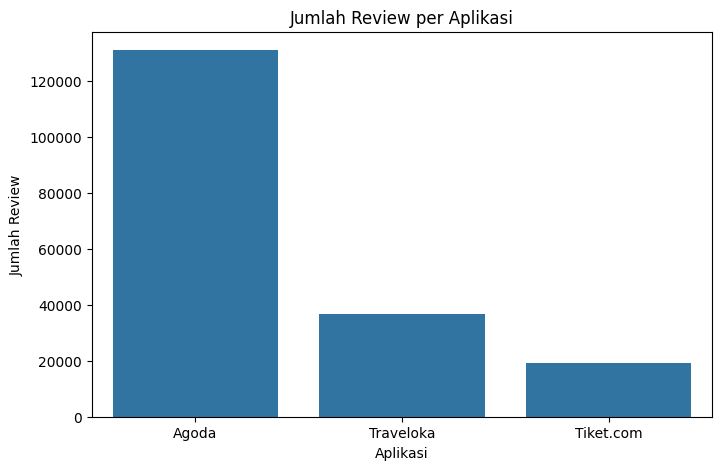

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Aplikasi', y='Jumlah Review', data=app_review_counts)
plt.title('Jumlah Review per Aplikasi')
plt.xlabel('Aplikasi')
plt.ylabel('Jumlah Review')
plt.show()

In [66]:
# -------------------------
# 1. Klasifikasi sentimen berdasarkan rating
# -------------------------
def label_sentiment(score):
    if score <= 2:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    else:
        return 'Positif'

df['sentimen'] = df['score'].apply(label_sentiment)

df[['score', 'sentimen']].head()


,score,sentimen
0,5,Positif
1,5,Positif
2,5,Positif
3,5,Positif
4,5,Positif


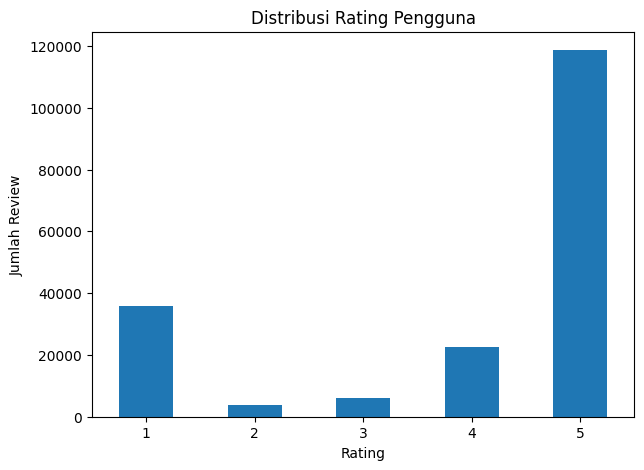

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
df['score'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribusi Rating Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.xticks(rotation=0)
plt.show()


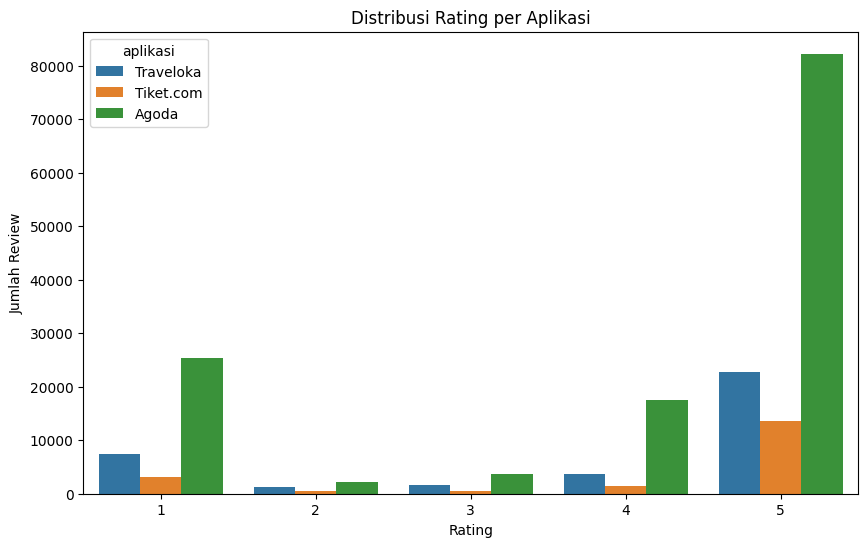

In [68]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='score', hue='aplikasi')
plt.title('Distribusi Rating per Aplikasi')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.show()


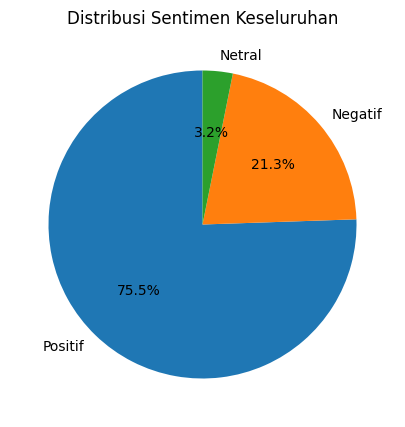

In [69]:
plt.figure(figsize=(6,5))
df['sentimen'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Sentimen Keseluruhan')
plt.ylabel('')
plt.show()


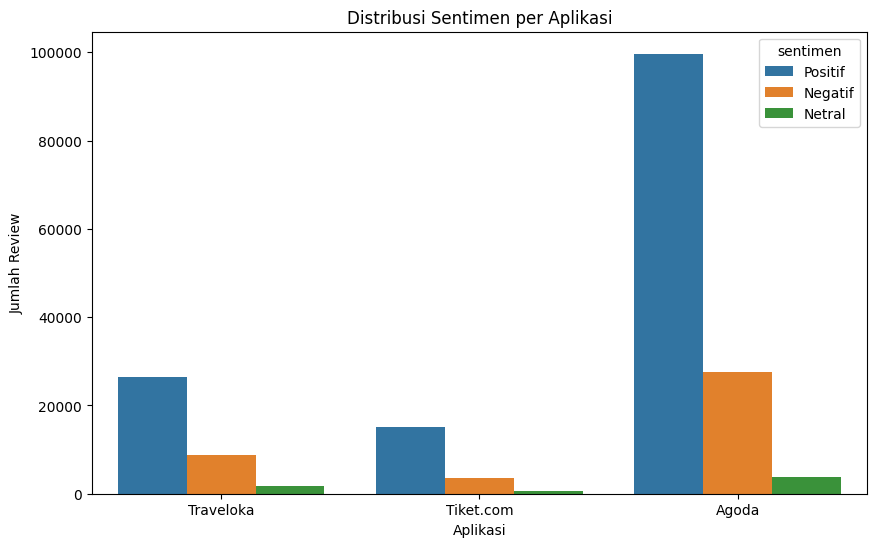

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='aplikasi', hue='sentimen')
plt.title('Distribusi Sentimen per Aplikasi')
plt.xlabel('Aplikasi')
plt.ylabel('Jumlah Review')
plt.show()


In [71]:
sentiment_pct = (
    df.groupby(['aplikasi', 'sentimen'])
      .size()
      .reset_index(name='jumlah')
)

sentiment_pct['persentase'] = (
    sentiment_pct['jumlah'] /
    sentiment_pct.groupby('aplikasi')['jumlah'].transform('sum') * 100
)

sentiment_pct


,aplikasi,sentimen,jumlah,persentase
0,Agoda,Negatif,27583,21.061031
1,Agoda,Netral,3707,2.830484
2,Agoda,Positif,99677,76.108485
3,Tiket.com,Negatif,3514,18.405615
4,Tiket.com,Netral,556,2.912215
5,Tiket.com,Positif,15022,78.682171
6,Traveloka,Negatif,8699,23.665597
7,Traveloka,Netral,1642,4.467055
8,Traveloka,Positif,26417,71.867349


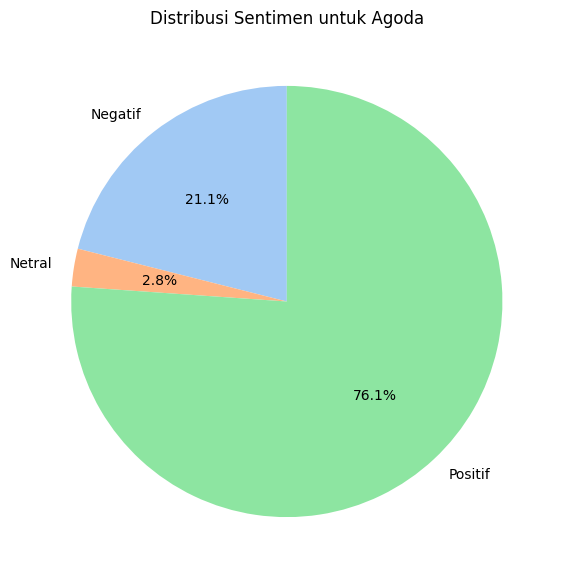

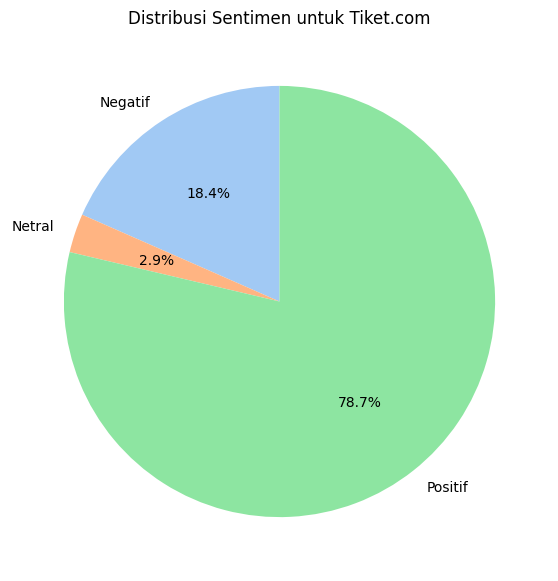

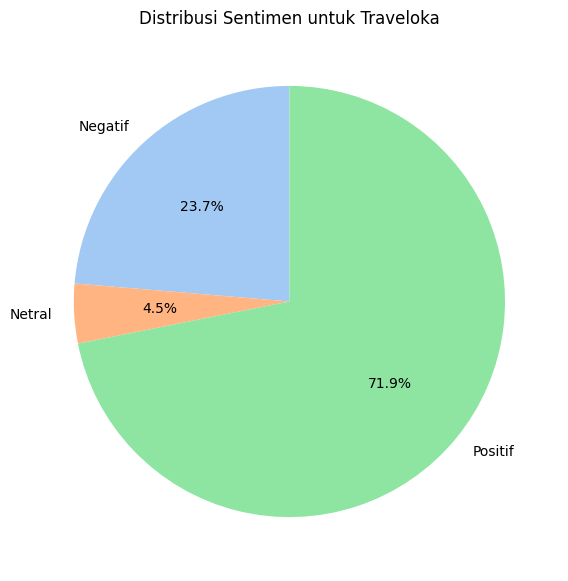

In [72]:
import matplotlib.pyplot as plt

apps = sentiment_pct['aplikasi'].unique()

for app in apps:
    df_app = sentiment_pct[sentiment_pct['aplikasi'] == app]

    plt.figure(figsize=(7, 7))
    plt.pie(
        df_app['persentase'],
        labels=df_app['sentimen'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel')
    )
    plt.title(f'Distribusi Sentimen untuk {app}')
    plt.ylabel('') # Hide the default 'y' label
    plt.show()

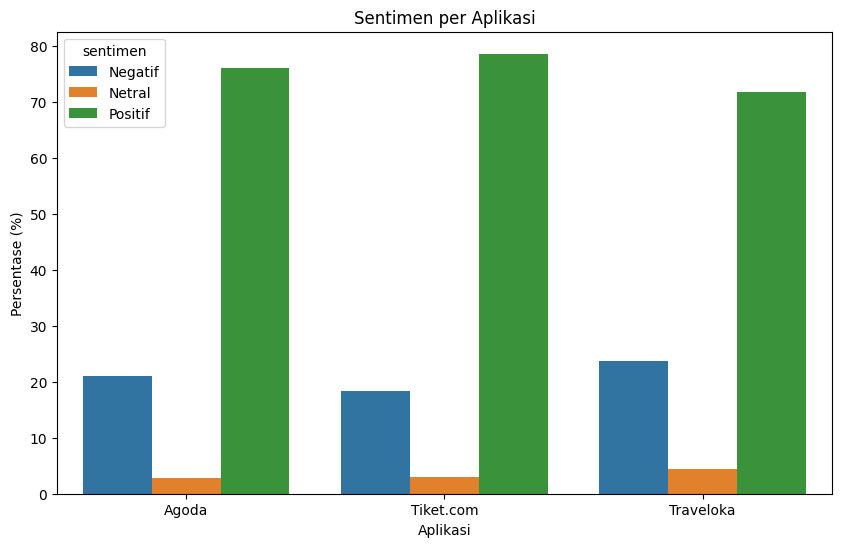

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=sentiment_pct, x='aplikasi', y='persentase', hue='sentimen')
plt.title('Sentimen per Aplikasi')
plt.ylabel('Persentase (%)')
plt.xlabel('Aplikasi')
plt.show()


## **Trend Sentimen Per Tahun**

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan kolom tahun ada
df['tahun'] = df['at'].dt.year # Corrected: Extract year directly from 'at' column

# Hitung jumlah ulasan per tahun & sentimen
trend_tahunan = (
    df.groupby(['aplikasi', 'tahun', 'sentimen'])
      .size()
      .reset_index(name='jumlah')
)


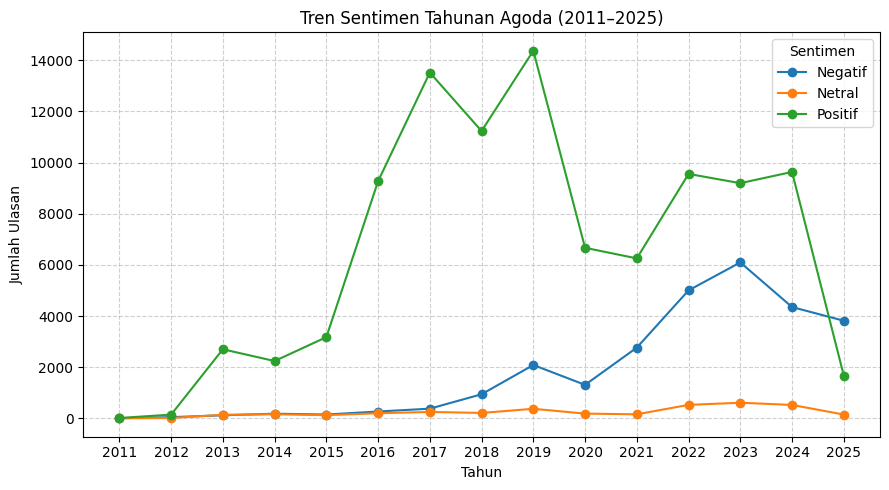

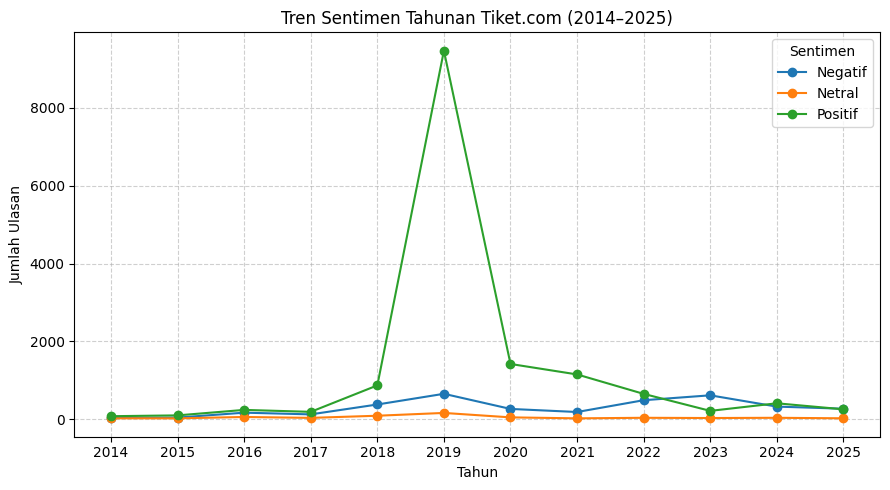

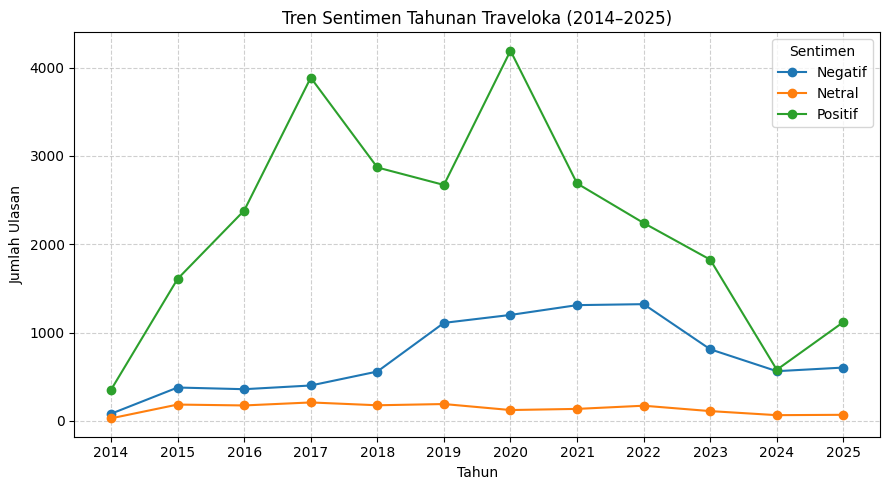

In [75]:
for app in trend_tahunan['aplikasi'].unique():
    data_app = trend_tahunan[trend_tahunan['aplikasi'] == app]

    plt.figure(figsize=(9, 5))

    for sent in data_app['sentimen'].unique():
        data_sent = data_app[data_app['sentimen'] == sent]
        plt.plot(
            data_sent['tahun'],
            data_sent['jumlah'],
            marker='o',
            label=sent
        )

    tahun_awal = data_app['tahun'].min()
    tahun_akhir = data_app['tahun'].max()

    plt.title(f'Tren Sentimen Tahunan {app} ({tahun_awal}–{tahun_akhir})')
    plt.xlabel('Tahun')
    plt.ylabel('Jumlah Ulasan')
    plt.xticks(sorted(data_app['tahun'].unique()))
    plt.legend(title='Sentimen')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


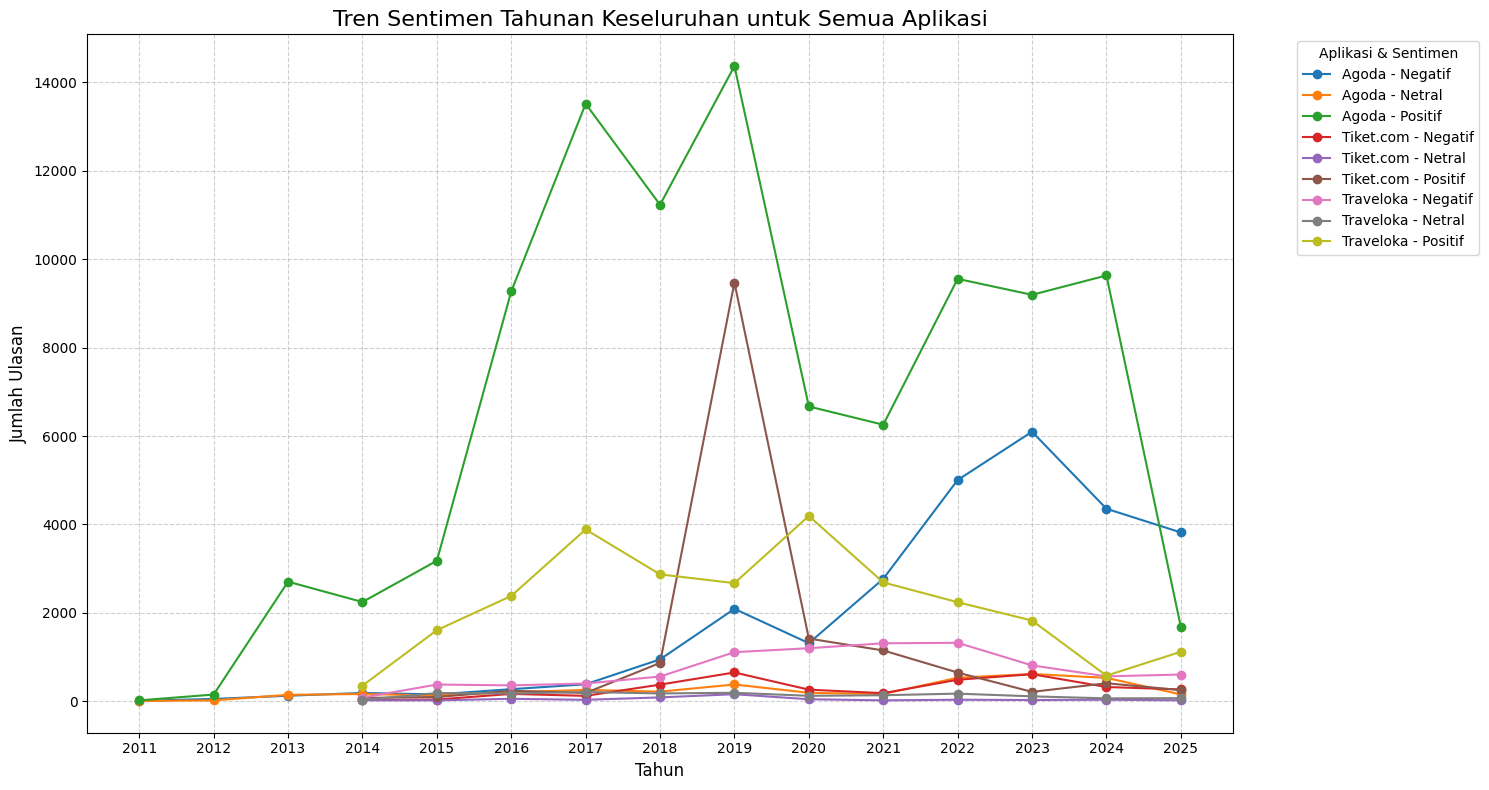

In [76]:
plt.figure(figsize=(15, 8))

# Loop through each application and each sentiment to plot all on one graph
for app in trend_tahunan['aplikasi'].unique():
    data_app = trend_tahunan[trend_tahunan['aplikasi'] == app]

    for sent in data_app['sentimen'].unique():
        data_sent = data_app[data_app['sentimen'] == sent]
        plt.plot(
            data_sent['tahun'],
            data_sent['jumlah'],
            marker='o',
            label=f'{app} - {sent}' # Unique label for each line
        )

plt.title('Tren Sentimen Tahunan Keseluruhan untuk Semua Aplikasi', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.xticks(sorted(trend_tahunan['tahun'].unique()))
plt.legend(title='Aplikasi & Sentimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [77]:
from wordcloud import WordCloud

positive_text = ' '.join(df[df['sentimen']=='Positif']['clean_content'])
negative_text = ' '.join(df[df['sentimen']=='Negatif']['clean_content'])

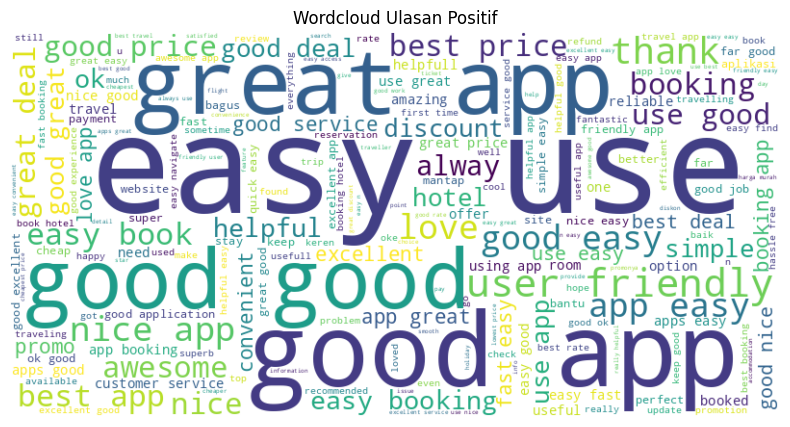

In [78]:
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

plt.figure(figsize=(12,5))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Ulasan Positif')
plt.show()


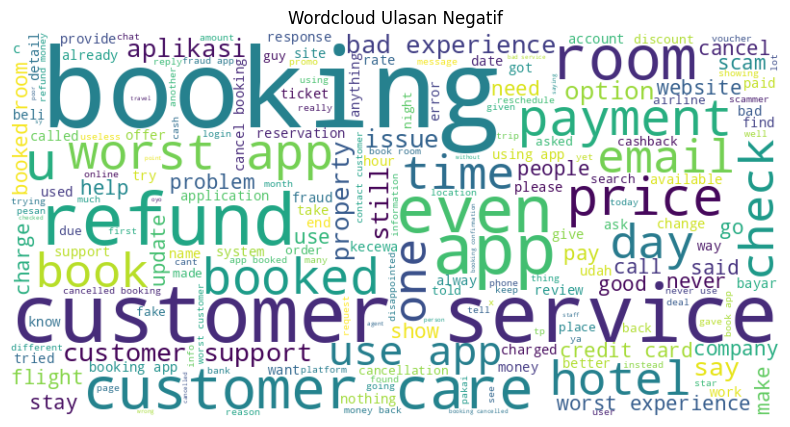

In [79]:
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(negative_text)

plt.figure(figsize=(12,5))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Ulasan Negatif')
plt.show()


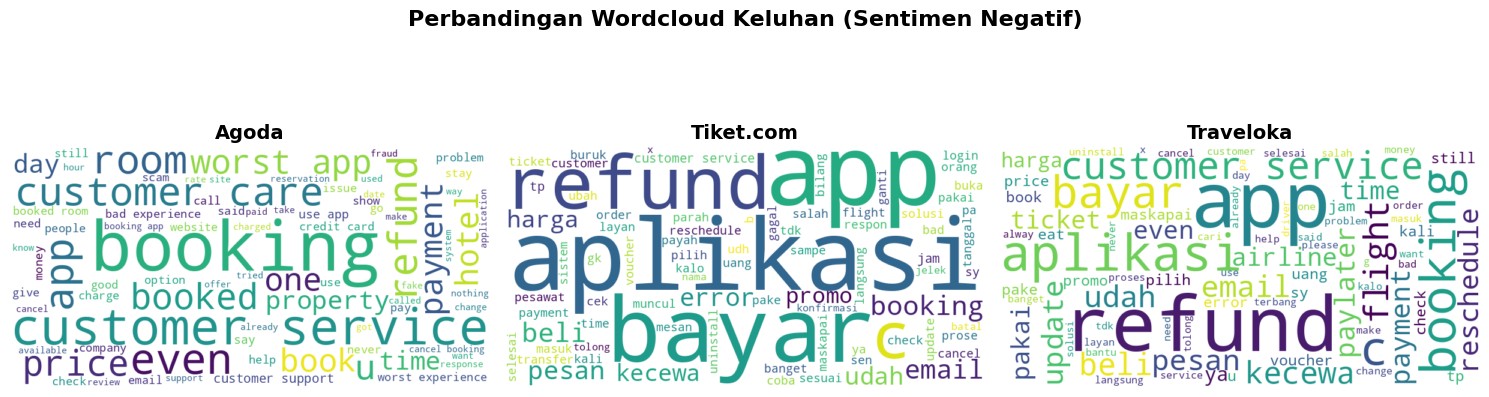

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Filter only negative sentiment reviews using the correct capitalization
df_negatif = df[df['sentimen'] == 'Negatif']

# List of applications
apps = ['Agoda', 'Tiket.com', 'Traveloka']

# Load the hotel image mask
try:
    # Path to your hotel image file (assuming it's named hotel.png or similar)
    hotel_mask = np.array(Image.open('/content/lokasi3.png')) # You might need to upload 'hotel.png'
    # Ensure the mask is grayscale or binary
    if hotel_mask.ndim == 3:
        hotel_mask = hotel_mask[:,:,0] # Take one channel if it's RGB
    print("Hotel mask loaded successfully.")
except FileNotFoundError:
    print("Warning: hotel.png not found. Negative WordClouds will be rectangular.")
    hotel_mask = None # Proceed without a mask if file not found

# Setup figure for PPT-friendly display
plt.figure(figsize=(15, 5))

for i, app in enumerate(apps):
    # Concatenate all clean_content for the current app and negative sentiment
    text = " ".join(df_negatif[df_negatif['aplikasi'] == app]['clean_content'].dropna())

    # Generate word cloud only if there is text available
    if text:
        wc = WordCloud(
            width=800,
            height=400,
            background_color='white',
            colormap='viridis',
            max_words=80,
            mask=hotel_mask # Apply the hotel mask here
        ).generate(text)

        plt.subplot(1, 3, i + 1)
        plt.imshow(wc, interpolation='bilinear')
        plt.title(app, fontsize=14, weight='bold')
        plt.axis('off')
    else:
        plt.subplot(1, 3, i + 1)
        plt.title(f"{app}\n(No Negative Reviews Found)", fontsize=14, weight='bold')
        plt.axis('off')

plt.suptitle("Perbandingan Wordcloud Keluhan (Sentimen Negatif)", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

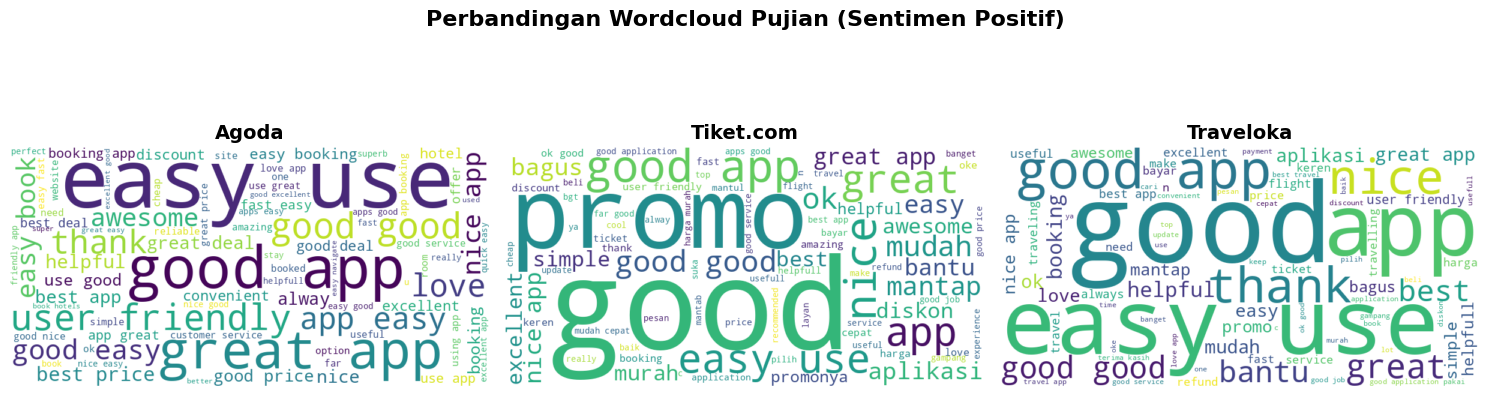

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Filter only positive sentiment reviews
df_positif = df[df['sentimen'] == 'Positif']

# List of applications
apps = ['Agoda', 'Tiket.com', 'Traveloka']

# Load the airplane image mask
# You might need to upload a suitable airplane image to your Colab environment or provide a URL.
# For demonstration, I'll assume you have an 'airplane.png' in your files.
# If you don't have one, you can skip the mask or upload an image and change the path.

try:
    # Path to your airplane image file
    airplane_mask = np.array(Image.open('/content/depan.jpg'))
    # Ensure the mask is grayscale or binary
    if airplane_mask.ndim == 3:
        airplane_mask = airplane_mask[:,:,0] # Take one channel if it's RGB
    print("Airplane mask loaded successfully.")
except FileNotFoundError:
    print("Warning: airplane.png not found. WordCloud will be rectangular.")
    airplane_mask = None # Proceed without a mask if file not found


# Setup figure for PPT-friendly display
plt.figure(figsize=(15, 5))

for i, app in enumerate(apps):
    # Concatenate all clean_content for the current app and positive sentiment
    text = " ".join(df_positif[df_positif['aplikasi'] == app]['clean_content'].dropna())

    # Generate word cloud only if there is text available
    if text:
        wc = WordCloud(
            width=800,
            height=400,
            background_color='white',
            colormap='viridis',
            max_words=80,
            mask=airplane_mask # Apply the airplane mask here
        ).generate(text)

        plt.subplot(1, 3, i + 1)
        plt.imshow(wc, interpolation='bilinear')
        plt.title(app, fontsize=14, weight='bold')
        plt.axis('off')
    else:
        plt.subplot(1, 3, i + 1)
        plt.title(f"{app}\n(No Positive Reviews Found)", fontsize=14, weight='bold')
        plt.axis('off')

plt.suptitle("Perbandingan Wordcloud Pujian (Sentimen Positif)", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

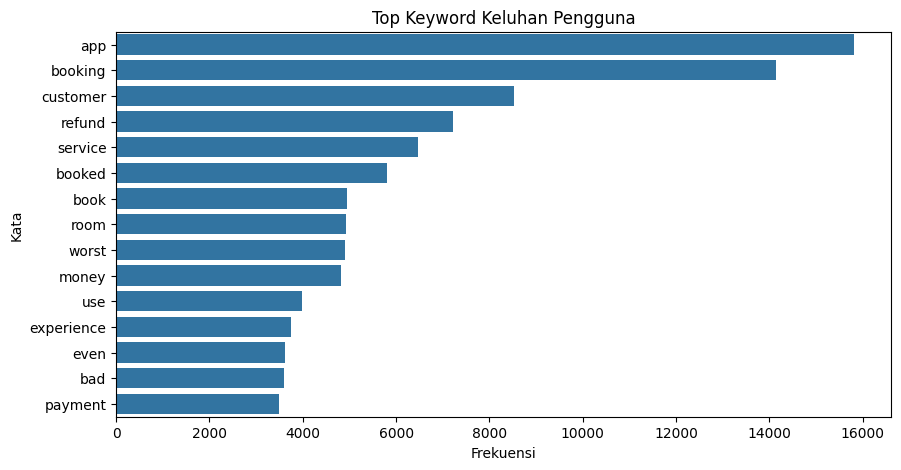

In [82]:
from collections import Counter

negative_reviews = df[df['sentimen']=='Negatif']['clean_content']
all_words = ' '.join(negative_reviews).split()

top_keywords = Counter(all_words).most_common(15)
top_keywords

keywords_df = pd.DataFrame(top_keywords, columns=['kata', 'frekuensi'])

plt.figure(figsize=(10,5))
sns.barplot(
    data=keywords_df,
    x='frekuensi',
    y='kata'
)
plt.title('Top Keyword Keluhan Pengguna')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [83]:
version_issue = (
    df[df['sentimen']=='Negatif']
    .groupby(['aplikasi', 'appVersion'])
    .size()
    .reset_index(name='jumlah')
    .sort_values('jumlah', ascending=False)
)

version_issue.head(10)


,aplikasi,appVersion,jumlah
501,Agoda,Unknown,5657
1060,Traveloka,Unknown,1630
795,Tiket.com,Unknown,701
44,Agoda,10.49.0,520
98,Agoda,11.49.0,329
495,Agoda,9.46.1,292
149,Agoda,12.48.0,267
86,Agoda,11.39.1,221
75,Agoda,11.30.0,213
201,Agoda,13.47.0,175


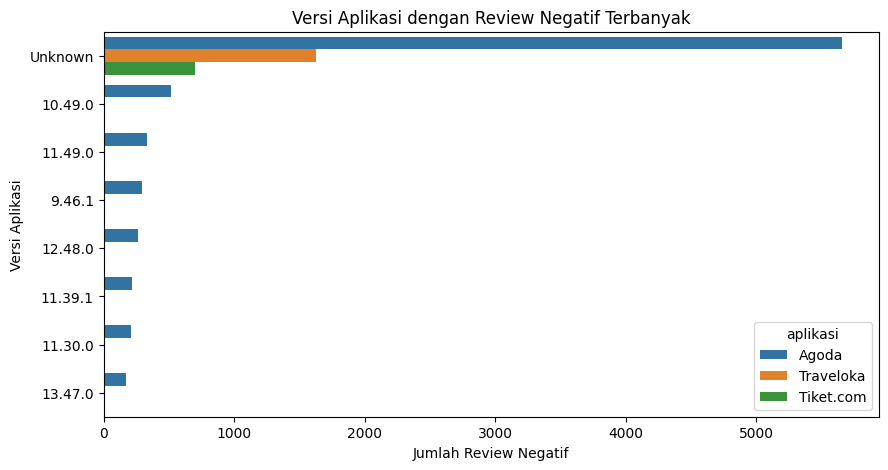

In [84]:
top_versions = version_issue.head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    data=top_versions,
    x='jumlah',
    y='appVersion',
    hue='aplikasi'
)
plt.title('Versi Aplikasi dengan Review Negatif Terbanyak')
plt.xlabel('Jumlah Review Negatif')
plt.ylabel('Versi Aplikasi')
plt.show()

# **Latent Dirichlet Allocation (LDA)**

In [85]:
def generate_topic(teks, n_top_words=10, n_topik = 3):
  count_vectorizer = CountVectorizer()
  count_data = count_vectorizer.fit_transform(teks)
  lda = LDA(n_components=n_topik, n_jobs=-1)
  lda.fit(count_data)
  words = count_vectorizer.get_feature_names_out()
  for topic_idx, topic in enumerate(lda.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [86]:
#Analisis topik per label
print('=== rating negatif ===')
teks_negatif = list(df[df['sentimen']=='Negatif']['clean_content'])
generate_topic(teks_negatif, n_top_words=10, n_topik = 3)

print('=== rating netral ===')
teks_netral = list(df[df['sentimen']=='Netral']['clean_content'])
generate_topic(teks_netral, n_top_words=10, n_topik = 3)

print('=== rating positif ===')
teks_positif = list(df[df['sentimen']=='Positif']['clean_content'])
generate_topic(teks_positif, n_top_words=10, n_topik = 3)

=== rating negatif ===

Topic #0:
aplikasi refund bayar cs pesan harga booking udah kecewa beli

Topic #1:
booking app booked money refund room worst customer book payment

Topic #2:
app customer service bad price booking apps use even time
=== rating netral ===

Topic #0:
good slow service apps best bad price loading card far

Topic #1:
app booking price use payment book please time easy ok

Topic #2:
aplikasi bayar harga update pilih ya app booking tolong promo
=== rating positif ===

Topic #0:
good easy use app nice apps fast excellent friendly helpful

Topic #1:
app booking best price always book hotels prices great using

Topic #2:
great app best mudah aplikasi travel bantu promo booking harga


In [87]:
topic_models_results = {}

apps = df['aplikasi'].unique()
sentiments_to_process = ['Positif', 'Negatif'] # Corrected: Use capitalized sentiment names

for app_name in apps:
    topic_models_results[app_name] = {}
    for sentiment_name in sentiments_to_process:
        filtered_df = df[(df['aplikasi'] == app_name) & (df['sentimen'] == sentiment_name)]

        if filtered_df.empty or filtered_df['clean_content'].empty:
            print(f"No data for application: {app_name}, sentiment: {sentiment_name}. Skipping.")
            continue

        try:
            df_with_topics, lda_model, vectorizer = build_topic_model(filtered_df, n_topics=3)
            topic_models_results[app_name][sentiment_name] = {
                'df': df_with_topics,
                'lda_model': lda_model,
                'vectorizer': vectorizer
            }
            print(f"Successfully built topic model for {app_name} - {sentiment_name}")
        except ValueError as e:
            print(f"Error building topic model for {app_name} - {sentiment_name}: {e}")

print("Topic model building complete. Results stored in topic_models_results.")

Successfully built topic model for Traveloka - Positif
Successfully built topic model for Traveloka - Negatif
Successfully built topic model for Tiket.com - Positif
Successfully built topic model for Tiket.com - Negatif
Successfully built topic model for Agoda - Positif
Successfully built topic model for Agoda - Negatif
Topic model building complete. Results stored in topic_models_results.


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def build_topic_model(df, n_topics=2):
    if df.empty:
        raise ValueError("DataFrame kosong")

    # Ensure 'clean_content' column exists and is not empty
    if 'clean_content' not in df.columns or df['clean_content'].empty:
        raise ValueError("Kolom 'clean_content' tidak ditemukan atau kosong di DataFrame.")

    vectorizer = CountVectorizer(
        max_df=0.9,
        min_df=1,
        stop_words='english' # Assuming English stop words are sufficient for this step or will be handled by previous cleaning
    )

    X = vectorizer.fit_transform(df['clean_content'].dropna()) # Handle potential NaN values

    lda = LatentDirichletAllocation(
        n_components=n_topics,
        random_state=42
    )

    topic_matrix = lda.fit_transform(X)

    df_copy = df.copy()
    df_copy['dominant_topic'] = topic_matrix.argmax(axis=1)

    return df_copy, lda, vectorizer

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_topic_distribution_colab(df_sentiment, sentiment_label, topic_names, app_name=""):
    if 'dominant_topic' not in df_sentiment.columns:
        raise ValueError("Kolom 'dominant_topic' belum ada")

    topic_proportions = (
        df_sentiment['dominant_topic']
        .value_counts(normalize=True)
        .sort_index()
    )

    plot_df = pd.DataFrame({
        'Topik ID': topic_proportions.index,
        'Proporsi': topic_proportions.values
    })

    plot_df['Nama Topik'] = plot_df['Topik ID'].apply(
        lambda x: topic_names.get(x, f'Topik {x+1}')
    )

    plt.figure(figsize=(9, 6))
    sns.barplot(
        x='Proporsi',
        y='Nama Topik',
        data=plot_df,
        orient='h'
    )

    for i, row in plot_df.iterrows():
        plt.text(row.Proporsi + 0.01, i, f'{row.Proporsi*100:.1f}%', va='center')

    plt.title(f'Distribusi Alasan Dominan – {app_name} ({sentiment_label})')
    plt.xlabel('Proporsi Komentar')
    plt.ylabel('Topik')
    plt.xlim(0, 1.1)
    plt.grid(axis='x', linestyle='--')
    plt.show()


TOPIC_NAMES_POS = {
    0: "Kepuasan Pengguna",
    1: "Apresiasi Layanan",
    2: "Kemudahan & Kualitas Aplikasi"
}

TOPIC_NAMES_NEG = {
    0: "Keluhan Teknis",
    1: "Masalah Pelayanan",
    2: "Harga & Penawaran" # Added for 3 topics
}

TOPIC_NAMES_NEU = {
    0: "Informasi Umum",
    1: "Pendapat Netral",
    2: "Interaksi Pengguna" # Added for 3 topics
}

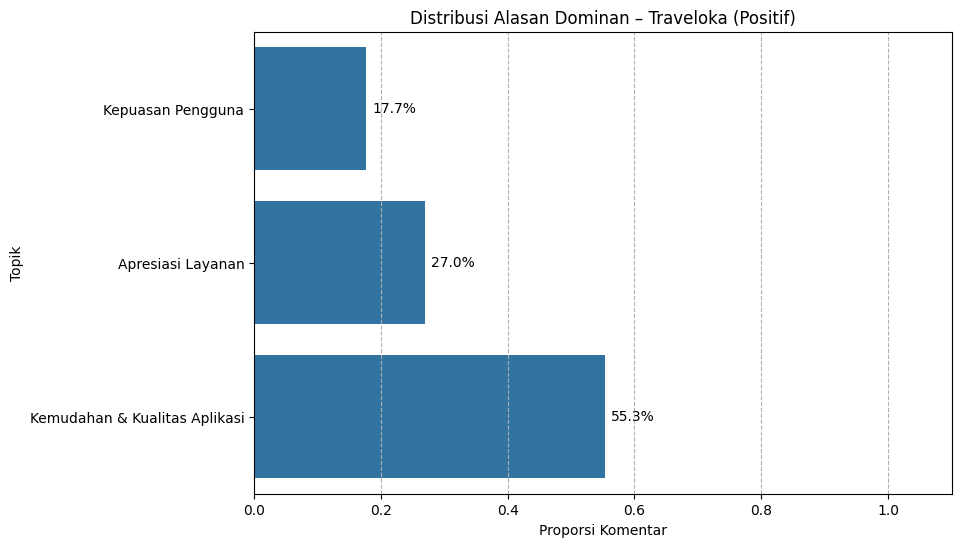

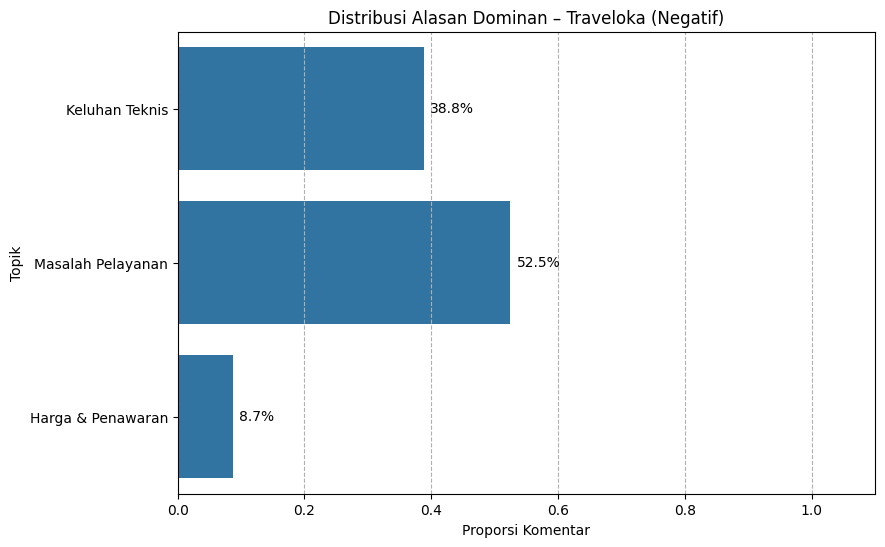

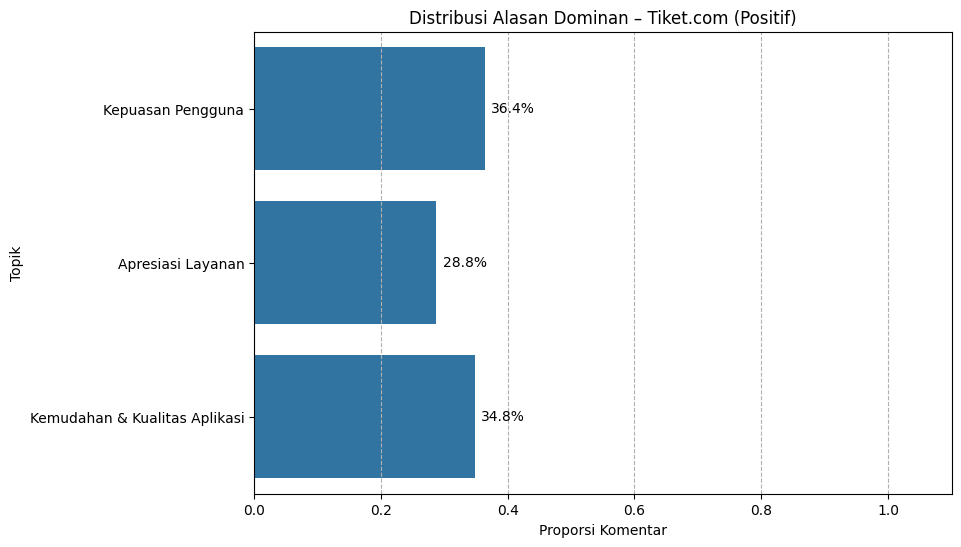

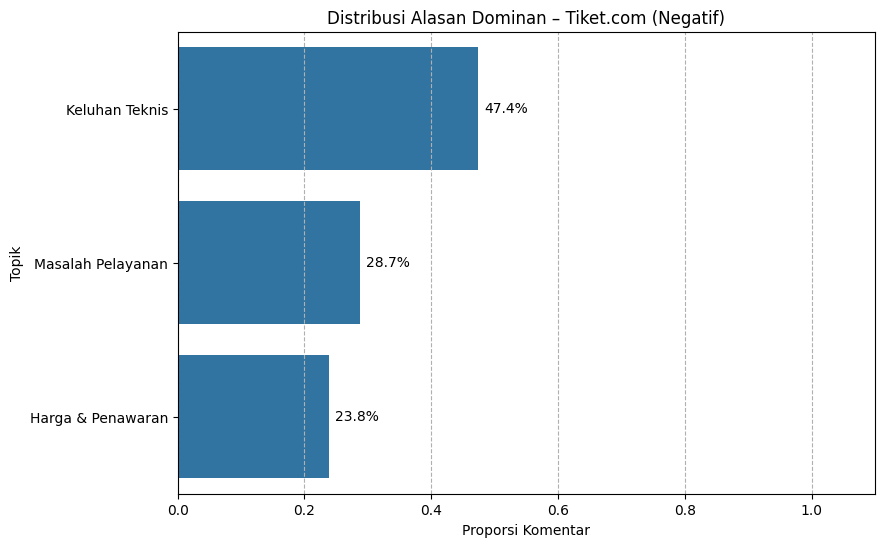

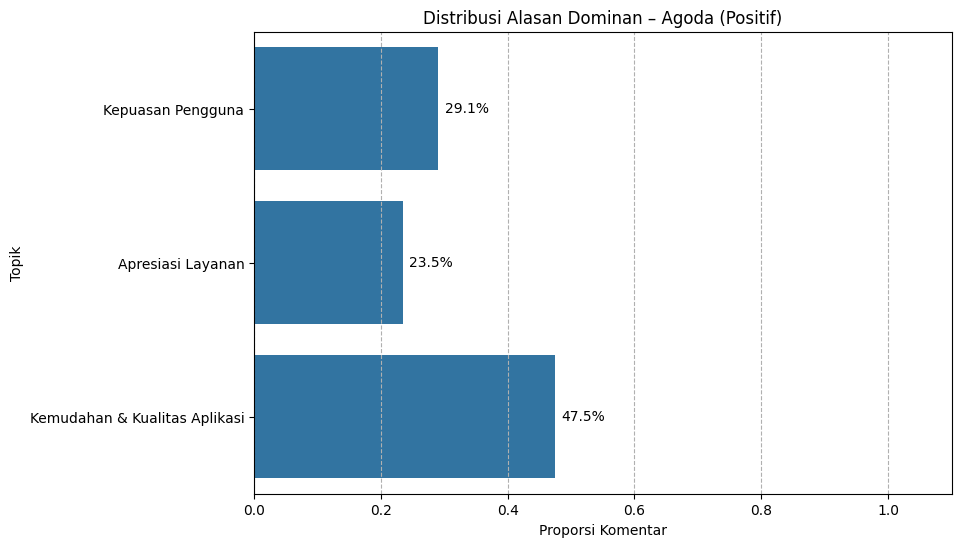

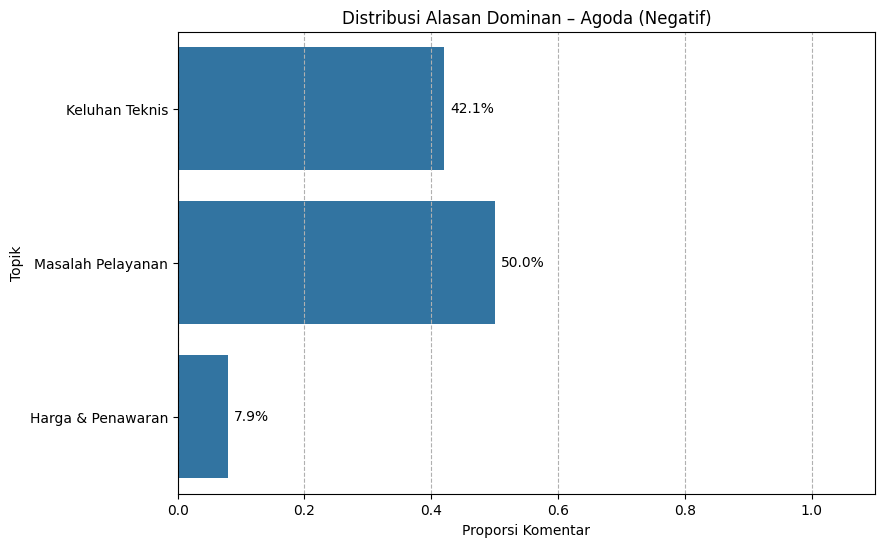

In [90]:
for app_name, sentiments_data in topic_models_results.items():
    for sentiment_name, model_data in sentiments_data.items():
        if sentiment_name == 'Positif':
            topic_names_dict = TOPIC_NAMES_POS
        elif sentiment_name == 'Negatif':
            topic_names_dict = TOPIC_NAMES_NEG
        # No need for 'netral' as it's filtered out

        df_with_topics = model_data['df']
        plot_topic_distribution_colab(df_with_topics, sentiment_name.capitalize(), topic_names_dict, app_name)

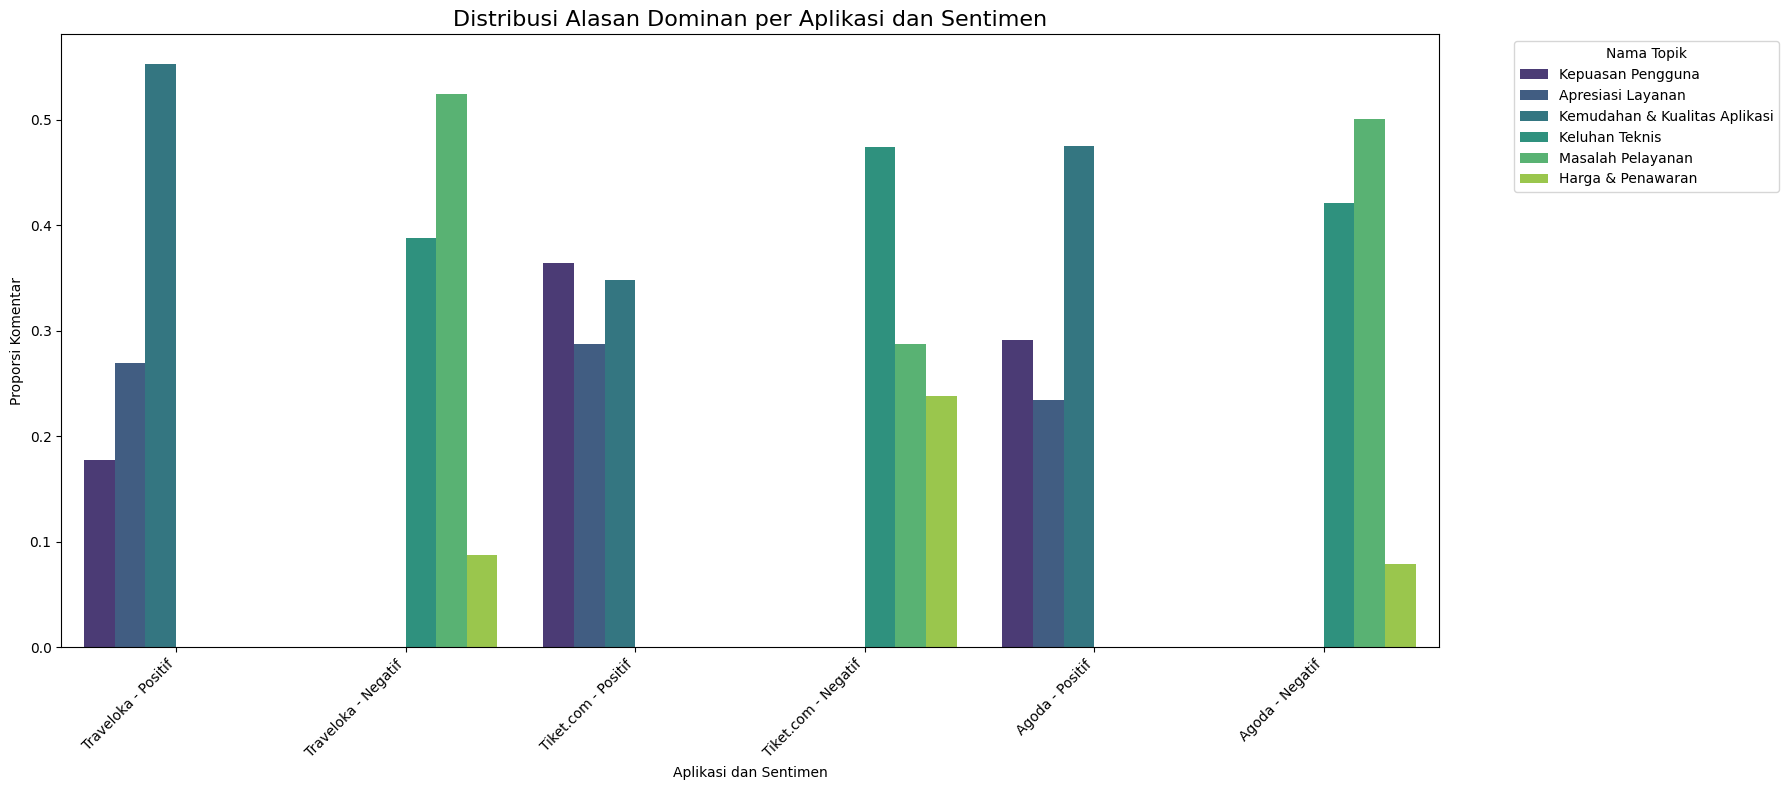

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_topic_data = []

for app_name, sentiments_data in topic_models_results.items():
    for sentiment_name, model_data in sentiments_data.items():
        if sentiment_name == 'Positif':
            topic_names_dict = TOPIC_NAMES_POS
        elif sentiment_name == 'Negatif':
            topic_names_dict = TOPIC_NAMES_NEG
        else:
            # Skip 'netral' sentiments as per previous processing
            continue

        df_with_topics = model_data['df']
        if df_with_topics.empty:
            continue

        topic_proportions = (
            df_with_topics['dominant_topic']
            .value_counts(normalize=True)
            .sort_index()
        )

        for topic_id, proportion in topic_proportions.items():
            topic_label = topic_names_dict.get(topic_id, f'Topik {topic_id+1}')
            combined_topic_data.append({
                'Aplikasi': app_name,
                'Sentimen': sentiment_name.capitalize(),
                'Nama Topik': topic_label,
                'Proporsi': proportion
            })

df_combined_topics = pd.DataFrame(combined_topic_data)

# Create a combined category for the x-axis for a single plot
df_combined_topics['App_Sentiment'] = df_combined_topics['Aplikasi'] + ' - ' + df_combined_topics['Sentimen']

plt.figure(figsize=(18, 8))
sns.barplot(
    data=df_combined_topics,
    x='App_Sentiment',
    y='Proporsi',
    hue='Nama Topik',
    palette='viridis'
)
plt.title('Distribusi Alasan Dominan per Aplikasi dan Sentimen', fontsize=16)
plt.xlabel('Aplikasi dan Sentimen')
plt.ylabel('Proporsi Komentar')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nama Topik', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [92]:
for app_name, sentiments_data in topic_models_results.items():
    for sentiment_name, model_data in sentiments_data.items():
        print(f"\n--- Analisis Topik untuk {app_name} - {sentiment_name.capitalize()} ---")

        df_with_topics = model_data['df']
        lda_model = model_data['lda_model']
        vectorizer = model_data['vectorizer']

        # Select appropriate topic names dictionary
        if sentiment_name == 'Positif':
            topic_names_dict = TOPIC_NAMES_POS
        elif sentiment_name == 'Negatif':
            topic_names_dict = TOPIC_NAMES_NEG
        # No need for 'netral' as it's filtered out

        # Print top keywords for each topic
        print(f"Top 10 Keywords per Topic for {app_name} - {sentiment_name.capitalize()}:")
        feature_names = vectorizer.get_feature_names_out()
        for topic_idx, topic in enumerate(lda_model.components_):
            top_words_indices = topic.argsort()[:-11:-1] # Get indices of top 10 words
            top_words = [feature_names[i] for i in top_words_indices]
            topic_label = topic_names_dict.get(topic_idx, f'Topik {topic_idx+1}')
            print(f"  {topic_label} (Topic {topic_idx}): {", ".join(top_words)}")


--- Analisis Topik untuk Traveloka - Positif ---
Top 10 Keywords per Topic for Traveloka - Positif:
  Kepuasan Pengguna (Topic 0): easy, use, simple, fast, excellent, like, usefull, book, booking, refund
  Apresiasi Layanan (Topic 1): mudah, aplikasi, bantu, harga, cepat, bagus, mantap, promo, murah, bayar
  Kemudahan & Kualitas Aplikasi (Topic 2): good, app, great, apps, best, nice, helpful, ok, love, travel

--- Analisis Topik untuk Traveloka - Negatif ---
Top 10 Keywords per Topic for Traveloka - Negatif:
  Keluhan Teknis (Topic 0): app, service, customer, flight, refund, bad, booking, ng, use, time
  Masalah Pelayanan (Topic 1): aplikasi, refund, bayar, cs, beli, kecewa, harga, pesan, jam, udah
  Harga & Penawaran (Topic 2): refund, payment, card, flight, ticket, paylater, reschedule, credit, error, travel

--- Analisis Topik untuk Tiket.com - Positif ---
Top 10 Keywords per Topic for Tiket.com - Positif:
  Kepuasan Pengguna (Topic 0): good, ok, app, apps, excellent, helpful, oke,